In [1]:
import pandas as pd
import os
import subprocess
import zipfile
import tarfile
import numpy as np
import matplotlib.pyplot as plt
import pylab 
import scipy.stats as st
import pymc3  as pm
import seaborn as sns
import arviz as az
from sklearn.preprocessing import scale
from matplotlib import rcParams
from scipy import interpolate

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
# Load in data
wave = np.array([412,443,488,531,547,555,667,678])
λ = np.array([412, 443, 469, 488, 531, 547, 555, 645, 667, 678], dtype=np.int32)

Rrs_aqua = np.load('Rrs_aqua.npy')
Rrs_mob = np.load('Rrs_mob.npy')
Lt = np.load('Lt.npy')
chlor_a = np.load('chlor_a.npy')
La = np.load('La.npy')
Lr = np.load('Lr.npy')
rhot = np.load('rhot.npy')
TLg = np.load('TLg.npy')
polcor = np.load('polcor.npy')
Es = np.load('Es.npy')
brdf = np.load('brdf.npy')
tLf = np.load('tLf.npy')
t_sol = np.load('t_sol.npy')
t_sen = np.load('t_sen.npy')
glint_coef = np.load('glint_coef.npy')
relaz = np.load('relaz.npy')
scattang = np.load('scattang.npy')

tg_sol = np.load('tg_sol.npy')
tg_sen = np.load('tg_sen.npy')
Lw = np.load('Lw.npy')
aot = np.load('aot.npy')
water_vapor = np.load('water_vapor.npy')
solz = np.load('solz.npy')
senz = np.load('senz.npy')
epsilon = np.load('epsilon.npy')
angstrom = np.load('angstrom.npy')
windspeed = np.load('windspeed.npy')
humidity = np.load('humidity.npy')
pressure = np.load('pressure.npy')
ozone = np.load('ozone.npy')



Lt[(Lt<0) | (Lt > 1000)] = np.nan
chlor_a[(chlor_a<0) | (chlor_a > 100)] = np.nan
La[(La<0) | (La > 1000)] = np.nan
Lr[(Lr<0) | (Lr > 1000)] = np.nan
rhot[(rhot<0) | (rhot > 1000)] = np.nan
TLg[(TLg<0) | (TLg > 1000)] = np.nan
polcor[(polcor<0) | (polcor > 1000)] = np.nan
Es[(Es<0) | (Es > 100000)] = np.nan
brdf[(brdf<0) | (brdf > 100)] = np.nan
tLf[(tLf<0) | (tLf > 100)] = np.nan
t_sol[(t_sol<0) | (t_sol > 10)] = np.nan
t_sen[(t_sen<0) | (t_sen > 10)] = np.nan

tg_sol[(tg_sol<0) | (tg_sol > 10)] = np.nan
tg_sen[(tg_sen<0) | (tg_sen > 10)] = np.nan
Lw[(Lw<0) | (Lw > 100)] = np.nan
aot[(aot<0) | (aot > 10)] = np.nan


relaz[(relaz<-360) | (relaz > 360)] = np.nan
scattang[(scattang<0) | (scattang > 360)] = np.nan
glint_coef[(glint_coef<0) | (glint_coef > 0.05)] = np.nan


chlor_a = np.nanmedian(chlor_a, axis=0)
relaz = np.nanmedian(relaz, axis=0)
scattang = np.nanmedian(scattang, axis=0)
glint_coef = np.nanmedian(glint_coef, axis=0)

Lt = np.nanmedian(Lt,axis=1)
La = np.nanmedian(La,axis=1)
Lr = np.nanmedian(Lr,axis=1)
rhot = np.nanmedian(rhot,axis=1)
TLg = np.nanmedian(TLg,axis=1)
polcor = np.nanmedian(polcor,axis=1)
Es = np.nanmedian(Es,axis=1)
brdf = np.nanmedian(brdf,axis=1)
tLf = np.nanmedian(tLf,axis=1)
t_sol = np.nanmedian(t_sol,axis=1)
t_sen = np.nanmedian(t_sen,axis=1)

tg_sol = np.nanmedian(tg_sol,axis=1)
tg_sen = np.nanmedian(tg_sen, axis=1)
Lw = np.nanmedian(Lw,axis=1)
aot = np.nanmedian(aot,axis=1)
water_vapor = np.nanmedian(water_vapor,axis=0)
solz = np.nanmedian(solz,axis=0)
senz = np.nanmedian(senz,axis=0)
angstrom = np.nanmedian(angstrom,axis=0)
epsilon = np.nanmedian(epsilon,axis=0)
windspeed = np.nanmedian(windspeed,axis=0)
humidity = np.nanmedian(humidity,axis=0)
pressure = np.nanmedian(pressure,axis=0)
ozone = np.nanmedian(ozone,axis=0)

Lti = interpolate.interp1d(λ, Lt.T)(wave).T
Lri = interpolate.interp1d(λ, Lr.T)(wave).T
Lai = interpolate.interp1d(λ, La.T)(wave).T
rhoti = interpolate.interp1d(λ, rhot.T)(wave).T
TLgi = interpolate.interp1d(λ, TLg.T)(wave).T
polcori = interpolate.interp1d(λ, polcor.T)(wave).T
Esi = interpolate.interp1d(λ, Es.T)(wave).T
brdfi = interpolate.interp1d(λ, brdf.T)(wave).T
tLfi = interpolate.interp1d(λ, tLf.T)(wave).T
t_soli = interpolate.interp1d(λ, t_sol.T)(wave).T
t_seni = interpolate.interp1d(λ, t_sen.T)(wave).T
tg_soli = interpolate.interp1d(λ, tg_sol.T)(wave).T
tg_seni = interpolate.interp1d(λ, tg_sen.T)(wave).T
Lwi = interpolate.interp1d(λ, Lw.T)(wave).T
aoti = interpolate.interp1d(λ, aot.T)(wave).T

/accounts/aibrahi2/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1116: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


In [59]:
ndata = len(wave)
Lt_names = ['Lt_%d' % wv for wv in wave]
Lr_names = ['Lr_%d' % wv for wv in wave]
La_names = ['La_%d' % wv for wv in wave]
TLg_names = ['TLg_%d' % wv for wv in wave]
tLf_names = ['tLf_%d' % wv for wv in wave]
polcor_names = ['polcor_%d' % wv for wv in wave]
brdf_names = ['brdf_%d' % wv for wv in wave]
Rrs_mob_names = ['Rrs_mob_%d' % wv for wv in wave]
Rrs_aqua_names = ['Rrs_aqua_%d' % wv for wv in wave]

chl_names = ['chlor_a_%d' % wv for wv in wave]
relaz_names = ['relaz_%d' % wv for wv in wave]
scat_names = ['scattang_%d' % wv for wv in wave]
glint_names = ['glint_coef_%d' % wv for wv in wave]

Lw_names = ['Lw_%d' % wv for wv in wave]
tg_sol_names = ['tg_sol_%d' % wv for wv in wave]
tg_sen_names = ['tg_sen_%d' % wv for wv in wave]
aot_names = ['aot_%d' % wv for wv in wave]

tsol_names = ['t_sol_%d' % wv for wv in wave]
tsen_names = ['t_sen_%d' % wv for wv in wave]

# water_vapor = np.nanmedian(water_vapor,axis=1)
# solz = np.nanmedian(solz,axis=1)
# senz = np.nanmedian(senz,axis=1)
# angstrom = np.nanmedian(angstrom,axis=1)
# epsilon = np.nanmedian(epsilon,axis=1)
# windspeed = np.nanmedian(windspeed,axis=1)
# humidity = np.nanmedian(humidity,axis=1)
# pressure = np.nanmedian(pressure,axis=1)
# ozone = np.nanmedian(ozone,axis=1)

water_vapor_names = ['water_vapor_%d' % wv for wv in wave]
solz_names = ['solz_%d' % wv for wv in wave]
senz_names = ['senz_%d' % wv for wv in wave]
angstrom_names = ['angstrom_%d' % wv for wv in wave]
epsilon_names = ['epsilon_%d' % wv for wv in wave]
windspeed_names = ['windspeed_%d' % wv for wv in wave]
humidity_names = ['humidity_%d' % wv for wv in wave]
pressure_names = ['pressure_%d' % wv for wv in wave]
ozone_names = ['ozone_%d' % wv for wv in wave]


chl_rep = np.repeat(np.atleast_2d(chlor_a),8, axis=0)
relaz_rep = np.repeat(np.atleast_2d(relaz),8, axis=0)
scattang_rep = np.repeat(np.atleast_2d(scattang),8, axis=0)
glint_coef_rep = np.repeat(np.atleast_2d(glint_coef),8, axis=0)

water_vapor_rep = np.repeat(np.atleast_2d(water_vapor),8, axis=0)
solz_rep = np.repeat(np.atleast_2d(solz),8, axis=0)
senz_rep = np.repeat(np.atleast_2d(senz),8, axis=0)
angstrom_rep = np.repeat(np.atleast_2d(angstrom),8, axis=0)
epsilon_rep = np.repeat(np.atleast_2d(epsilon),8, axis=0)
windspeed_rep = np.repeat(np.atleast_2d(windspeed),8, axis=0)
humidity_rep = np.repeat(np.atleast_2d(humidity),8, axis=0)
pressure_rep = np.repeat(np.atleast_2d(pressure),8, axis=0)
ozone_rep = np.repeat(np.atleast_2d(ozone),8, axis=0)

colnames = water_vapor_names + solz_names+senz_names+angstrom_names+epsilon_names+\
            windspeed_names+humidity_names+pressure_names+ozone_names+\
            chl_names + relaz_names+ scat_names + glint_names +\
            ['Rrs_mob_%d' % wv for wv in wave]+ ['Rrs_aqua_%d' % wv for wv in wave] +\
                ['Lt_%d' % wv for wv in wave] + ['La_%d' % wv for wv in wave] +\
                  ['Lr_%d' % wv for wv in wave] + ['rhot_%d' % wv for wv in wave] +\
                ['TLg_%d' % wv for wv in wave] + ['polcor_%d' % wv for wv in wave] +\
                ['Es_%d' % wv for wv in wave] + ['brdf_%d' % wv for wv in wave] +\
                ['tLf_%d' % wv for wv in wave] + ['t_sol_%d' % wv for wv in wave] +\
                ['t_sen_%d' % wv for wv in wave] + ['Rrs_diff_%d' % wv for wv in wave] + \
                ['tg_sol_%d' % wv for wv in wave] + ['tg_sen_%d' % wv for wv in wave] +\
                ['Lw_%d' % wv for wv in wave] + ['aot_%d' % wv for wv in wave]
df = pd.DataFrame(np.r_[water_vapor_rep,solz_rep,senz_rep,angstrom_rep,epsilon_rep,
                        windspeed_rep,humidity_rep,pressure_rep,ozone_rep,
                        chl_rep,relaz_rep, scattang_rep,glint_coef_rep, Rrs_mob.T, Rrs_aqua.T, Lti, Lai, Lri, rhoti, TLgi, polcori, Esi, brdfi,
                       tLfi, t_soli, t_seni, (Rrs_mob.T - Rrs_aqua.T), tg_soli, tg_seni, Lwi, aoti].T, 
                  columns = colnames)

lt_df_s = (df[Lt_names] - df[Lt_names].mean(axis=0)) / (df[Lt_names].std(axis=0))

ndf = df.dropna()
dfn = (ndf - ndf.mean())/ndf.std()
# np.repeat(np.atleast_2d(chlor_a),8, axis=0),

In [60]:
indx = np.arange(0,len(wave))

with pm.Model() as pooled_model_ST_MLR:
    hyp_α_sd = pm.HalfCauchy('hyp_α_sd', 1)
    hyp_β_sd = pm.HalfCauchy('hyp_β_sd', 1)
    
    # Independent parameters for each county
    α = pm.Normal('α', 0, sd=hyp_α_sd, shape=ndata)
    β0 = pm.Normal('β0', 0, sd=hyp_β_sd, shape=ndata)
    β1 = pm.Normal('β1', 0, sd=hyp_β_sd, shape=ndata)
    β2 = pm.Normal('β2', 0, sd=hyp_β_sd, shape=ndata)
    β3 = pm.Normal('β3', 0, sd=hyp_β_sd, shape=ndata)
    β4 = pm.Normal('β4', 0, sd=hyp_β_sd, shape=ndata)
#     β5 = pm.Normal('β5', 0, sd=hyp_β_sd, shape=ndata)
    
    # Model DOF
    ν = pm.Exponential('ν', 1/30)

    # Model error
    σ = pm.HalfCauchy('σ', 10)

    # Model prediction of radon level
    # a[county_idx] translates to a[0, 0, 0, 1, 1, ...],
    # we thus link multiple household measures of a county
    # to its coefficients.
    
#     Rrs_est = α[indx] + β0[indx]*dfn[Rrs_aqua_names] + β1[indx]*dfn[brdf_names]  +\
#                β2[indx]*dfn[windspeed_names] + β3[indx]*dfn[glint_names]
#     Rrs_est = α[indx] + β0[indx]*dfn[Rrs_aqua_names] + β1[indx]*dfn[solz_names]  +\
#                β2[indx]*dfn[senz_names] + β3[indx]*dfn[relaz_names]
#     Rrs_est = α[indx] + β0[indx]*dfn[Rrs_aqua_names] + β1[indx]*dfn[windspeed_names]  +\
#                β2[indx]*dfn[water_vapor_names] + β3[indx]*dfn[humidity_names] +\
#                β4[indx]*dfn[pressure_names] + β5[indx]*dfn[ozone_names]

#     Rrs_est = α[indx] + β0[indx]*dfn[Rrs_aqua_names] + β1[indx]*dfn[angstrom_names]  +\
#                β2[indx]*dfn[epsilon_names] + β3[indx]*dfn[aot_names]+ β4[indx]*dfn[polcor_names]

#     Rrs_est = α[indx] + β0[indx]*dfn[Rrs_aqua_names] + β1[indx]*dfn[Lr_names]  +\
#                β2[indx]*dfn[La_names] + β3[indx]*dfn[tLf_names]+ β4[indx]*dfn[TLg_names]

    Rrs_est = α[indx] + β0[indx]*dfn[Rrs_aqua_names] + β1[indx]*dfn[tsol_names]  +\
               β2[indx]*dfn[tsen_names] + β3[indx]*dfn[tg_sol_names]+ β4[indx]*dfn[tg_sen_names]


    # Data likelihood
    likelihood = pm.StudentT('Rrs_est', mu=Rrs_est, sd=σ, nu=ν, observed=dfn[Rrs_mob_names])
    
with pooled_model_ST_MLR:
    trace_hc_mlr = pm.sample(2000,tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, ν, β4, β3, β2, β1, β0, α, hyp_β_sd, hyp_α_sd]
Sampling 4 chains, 0 divergences: 100%|██████████| 16000/16000 [00:47<00:00, 339.38draws/s]


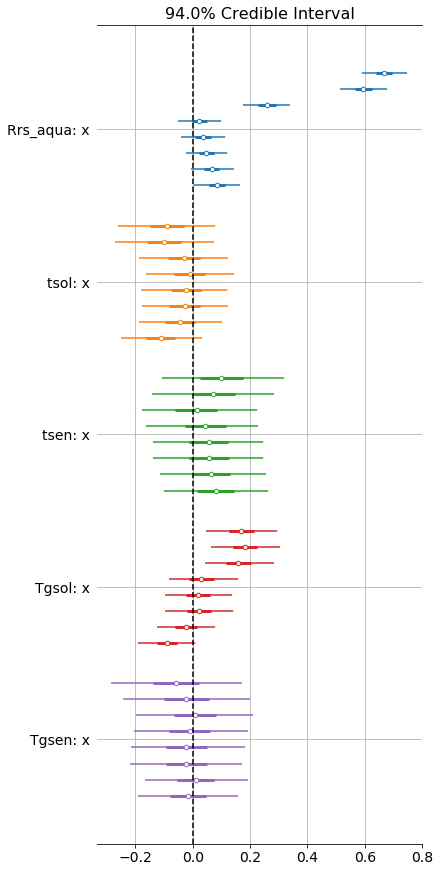

In [61]:
# mnames =  [ 'Rrs_aqua','brdf', 'windspeed', 'glint_coeff']
# mnames =  ['Rrs_aqua','solz', 'senz', 'relaz']
# mnames =  ['Rrs_aqua','windspeed', 'water_vapor', 'humidity', 'pressure', 'ozone']
# mnames =  ['Rrs_aqua','angstrom', 'epsilon', 'aot', 'polcor']
# mnames =  ['Rrs_aqua','Lr', 'La', 'tLf', 'TLg']
mnames =  ['Rrs_aqua','tsol', 'tsen', 'Tgsol', 'Tgsen']


ax = az.plot_forest([np.flipud(trace_hc_mlr['β0'].T), np.flipud(trace_hc_mlr['β1'].T),
               np.flipud(trace_hc_mlr['β2'].T), np.flipud(trace_hc_mlr['β3'].T)
                ,np.flipud(trace_hc_mlr['β4'].T), 
#                      np.flipud(trace_hc_mlr['β5'].T)    
                    ], 
               model_names=mnames)

# az.plot_forest([np.flipud(trace_hc_mlr['β0'].T), ], model_names=[ 'glint',])
ax[0].axvline(0, color='k', ls='--');
ax[0].grid()
# plt.savefig('forest_plot_at_surface.pdf', dpi=300, bbox_inches='tight')
# plt.savefig('forest_plot_geom.pdf', dpi=300, bbox_inches='tight')
# plt.savefig('forest_plot_ancillary_data.pdf', dpi=300, bbox_inches='tight')
# plt.savefig('forest_plot_aerosol.pdf', dpi=300, bbox_inches='tight')
# plt.savefig('forest_plot_radiances.pdf', dpi=300, bbox_inches='tight')
# plt.savefig('forest_plot_transmittances.pdf', dpi=300, bbox_inches='tight')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f99862a5160>],
      dtype=object)

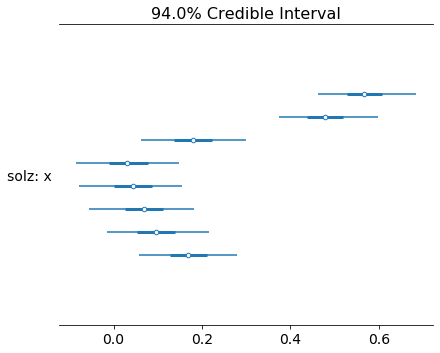

In [6]:
az.plot_forest(np.flipud(trace_hc_mlr['β0'].T), model_names=[ 'solz'])

In [48]:
(np.r_[np.repeat(np.atleast_2d(chlor_a),10, axis=0), Lt, La, Lr, rhot, TLg, polcor, Es, brdf,
                       tLf, t_sol, t_sen]).shape

(120, 523)

In [62]:
np.repeat(np.atleast_2d(chlor_a),8, axis=0).shape

(8, 523)

In [67]:
Lt.shape

(10, 523)

In [69]:
Lti = np.interp(wave, λ, Lt)

ValueError: object too deep for desired array

In [78]:
Lti = interpolate.interp1d(λ, Lt.T)(wave).T

In [79]:
f, ax = az.plot_forest([np.flipud(trace_hc_mlr['β0'].T), np.flipud(trace_hc_mlr['β1'].T)],
               model_names=[ 'solz', 'senz'], figsize=(7,5))
ax[0].axvline(0, color='k', ls='--');
ax[0].grid()
plt.title('Slope, 94.0% Credible Interval', fontsize=16)


(8, 523)

In [73]:
Lt.shape

(10, 523)

In [108]:
chlor_a.shape

(121,)

In [122]:
chlor_a = np.load('chlor_a.npy')


In [126]:
chlor_a = np.nanmean(chlor_a, axis=0)


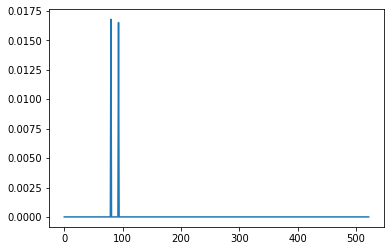

In [127]:
plt.plot(chlor_a);

In [135]:
ndf[Lt_names].shape

(209, 8)

In [136]:
Rrs_mob.shape

(523, 8)

In [139]:
df.shape

(523, 88)

In [177]:
x1 = np.mean(np.flipud(trace_hc_mlr['β0'].T), axis=1)

In [179]:
x2 = np.mean(np.flipud(trace_hc_mlr['β0'].T), axis=1)

In [180]:
100*(x1 - x2)/x2

array([-13.1870797 , -15.74644989,   5.05078099,   2.77102436,
       -20.548877  , -17.27383202,   0.47054302,  -1.83893478])

In [181]:
x1

array([0.22664026, 0.16270022, 0.22241696, 0.2287215 , 0.21212784,
       0.48720677, 0.8403203 , 0.88185493])

In [182]:
x2

array([0.26106743, 0.19310785, 0.21172328, 0.22255446, 0.26699163,
       0.58893912, 0.83638475, 0.89837546])

In [183]:
wave

array([412, 443, 488, 531, 547, 555, 667, 678])

In [187]:
Rrs_mob.shape

(523, 8)

In [189]:
Lti.shape

(8, 523)

In [220]:
ndf.shape

(193, 136)

In [221]:
df.shape

(523, 136)

In [226]:
dfn = (df - df.mean())/df.std()

In [229]:
dfn.std()

chlor_a_412    1.0
chlor_a_443    1.0
chlor_a_488    1.0
chlor_a_531    1.0
chlor_a_547    1.0
              ... 
t_sen_531      1.0
t_sen_547      1.0
t_sen_555      1.0
t_sen_667      1.0
t_sen_678      1.0
Length: 136, dtype: float64

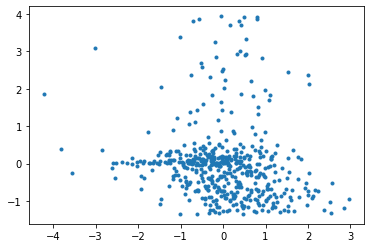

In [45]:
plt.plot(dfn['Rrs_diff_412'], dfn['polcor_412'], '.');
# plt.ylim([-.25,0])
# plt.plot(dfn['Rrs_mob_412'], dfn['scattang_412'], '.');

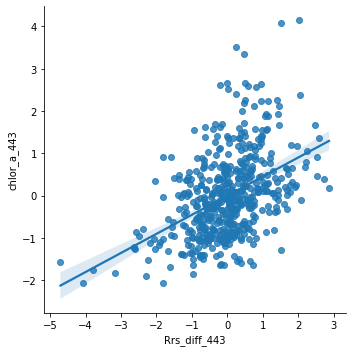

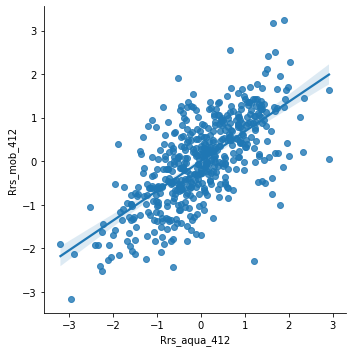

In [18]:
import seaborn as sns
sns.lmplot('Rrs_diff_443', 'chlor_a_443', dfn, ci=95)
sns.lmplot('Rrs_aqua_412', 'Rrs_mob_412', dfn, ci=95)


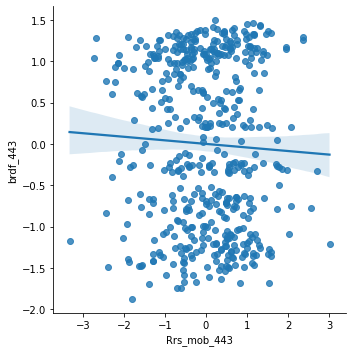

In [101]:
sns.lmplot('Rrs_mob_443', 'brdf_443', dfn, ci=95)


In [107]:
water_vapor.shape

(121,)

In [105]:
Lt.shape

(10, 523)

In [112]:
df

,water_vapor_412,water_vapor_443,water_vapor_488,water_vapor_531,water_vapor_547,water_vapor_555,water_vapor_667,water_vapor_678,solz_412,solz_443,...,t_sol_667,t_sol_678,t_sen_412,t_sen_443,t_sen_488,t_sen_531,t_sen_547,t_sen_555,t_sen_667,t_sen_678
0,3.383029,3.383029,3.383029,3.383029,3.383029,3.383029,3.383029,3.383029,21.288834,21.288834,...,0.96860,0.97025,0.83410,0.86610,0.90275,0.92655,0.93375,0.93630,0.96455,0.96635
1,2.623265,2.623265,2.623265,2.623265,2.623265,2.623265,2.623265,2.623265,19.819389,19.819389,...,0.96860,0.97000,0.85455,0.88325,0.91570,0.93640,0.94260,0.94470,0.96830,0.96970
2,3.329041,3.329041,3.329041,3.329041,3.329041,3.329041,3.329041,3.329041,23.088837,23.088837,...,0.96810,0.96955,0.85615,0.88470,0.91705,0.93760,0.94375,0.94590,0.96925,0.97065
3,2.573214,2.573214,2.573214,2.573214,2.573214,2.573214,2.573214,2.573214,32.349957,32.349957,...,0.96660,0.96835,0.79455,0.83265,0.87705,0.90630,0.91530,0.91855,0.95415,0.95645
4,3.094143,3.094143,3.094143,3.094143,3.094143,3.094143,3.094143,3.094143,22.530502,22.530502,...,0.95875,0.96030,0.77730,0.81455,0.85795,0.88660,0.89530,0.89835,0.93345,0.93560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,2.391980,2.391980,2.391980,2.391980,2.391980,2.391980,2.391980,2.391980,23.630501,23.630501,...,0.96530,0.96680,0.79030,0.82785,0.87150,0.90020,0.90900,0.91205,0.94640,0.94855
519,2.691465,2.691465,2.691465,2.691465,2.691465,2.691465,2.691465,2.691465,30.061066,30.061066,...,0.97180,0.97345,0.84255,0.87440,0.91075,0.93405,0.94115,0.94365,0.97095,0.97265
520,2.821936,2.821936,2.821936,2.821936,2.821936,2.821936,2.821936,2.821936,22.480499,22.480499,...,0.96035,0.96195,0.80580,0.83995,0.87940,0.90515,0.91300,0.91580,0.94700,0.94900
521,2.785033,2.785033,2.785033,2.785033,2.785033,2.785033,2.785033,2.785033,29.869396,29.869396,...,0.96900,0.97070,0.81725,0.85240,0.89300,0.91950,0.92755,0.93045,0.96245,0.96450


In [120]:
Lwi.shape

(8, 523)

In [116]:
Lti.shape

(8, 523)

In [124]:
tg_sen.shape

(10, 121, 523)

In [122]:
tg_sol.shape

(10, 523)

In [131]:
tg_sen = np.load('tg_sen.npy')
tg_sen[(tg_sen<0) | (tg_sen > 10)] = np.nan
tg_sen = np.nanmedian(tg_sen, axis=1)


/accounts/aibrahi2/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1116: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


In [132]:
tg_sen.shape

(10, 523)

In [135]:
np.save('moby_df', df)

In [136]:
df.to_pickle('moby_df')  

(array([424.,  28.,  14.,  10.,   6.,   6.,   5.,   4.,   4.,   6.]),
 array([2.61495469e-14, 4.90789721e-04, 9.81579442e-04, 1.47236916e-03,
        1.96315888e-03, 2.45394860e-03, 2.94473832e-03, 3.43552805e-03,
        3.92631777e-03, 4.41710749e-03, 4.90789721e-03]),
 <a list of 10 Patch objects>)

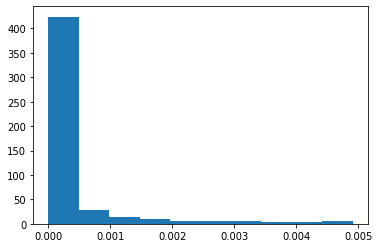

In [154]:
plt.hist(df['glint_coef_678'])

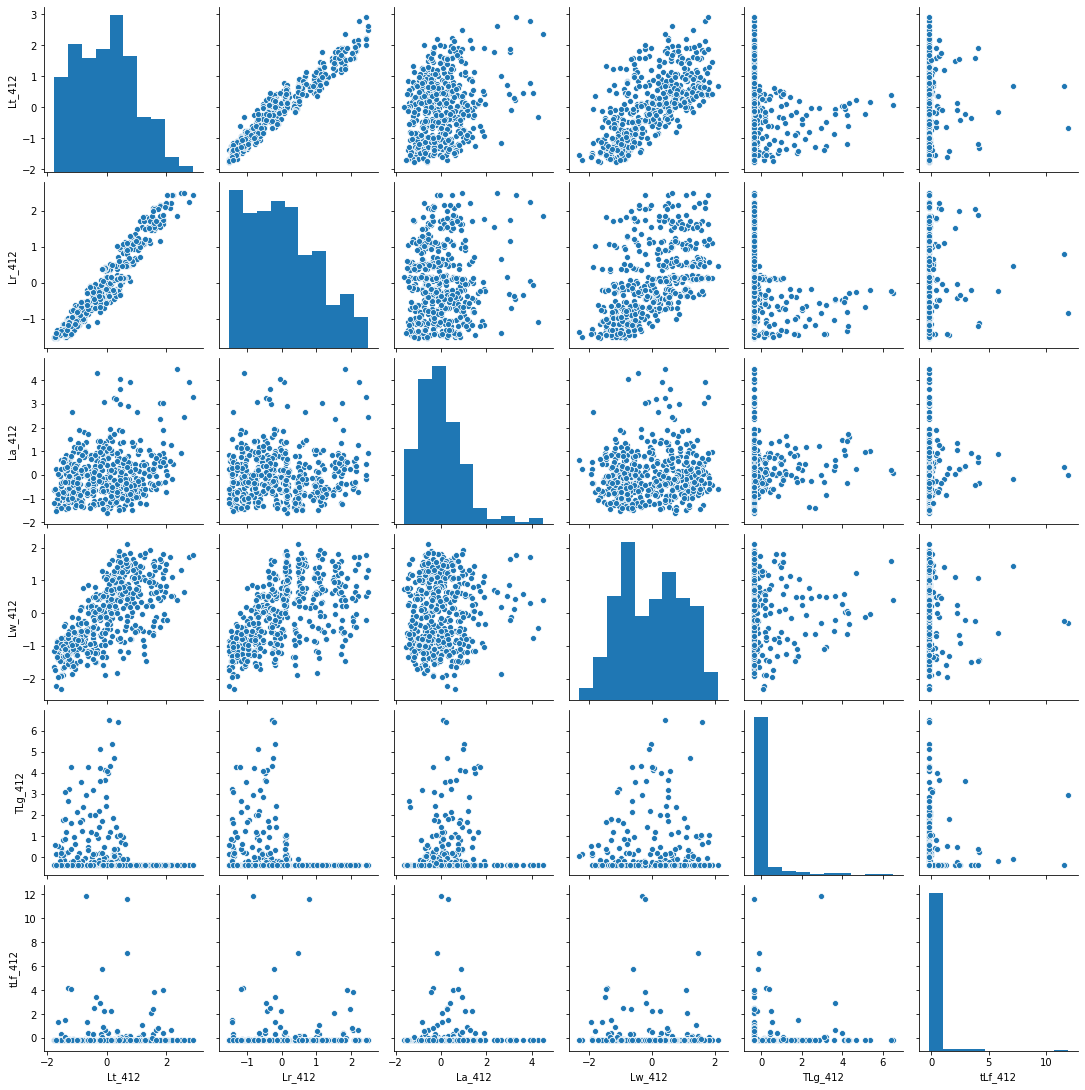

In [11]:
sns.pairplot(dfn, vars= ['Lt_412', 'Lr_412', 'La_412', 'Lw_412', 'TLg_412', 'tLf_412'] )
plt.savefig('correlation_plot_radiance_L_412.pdf', dpi=300, bbox_inches='tight')

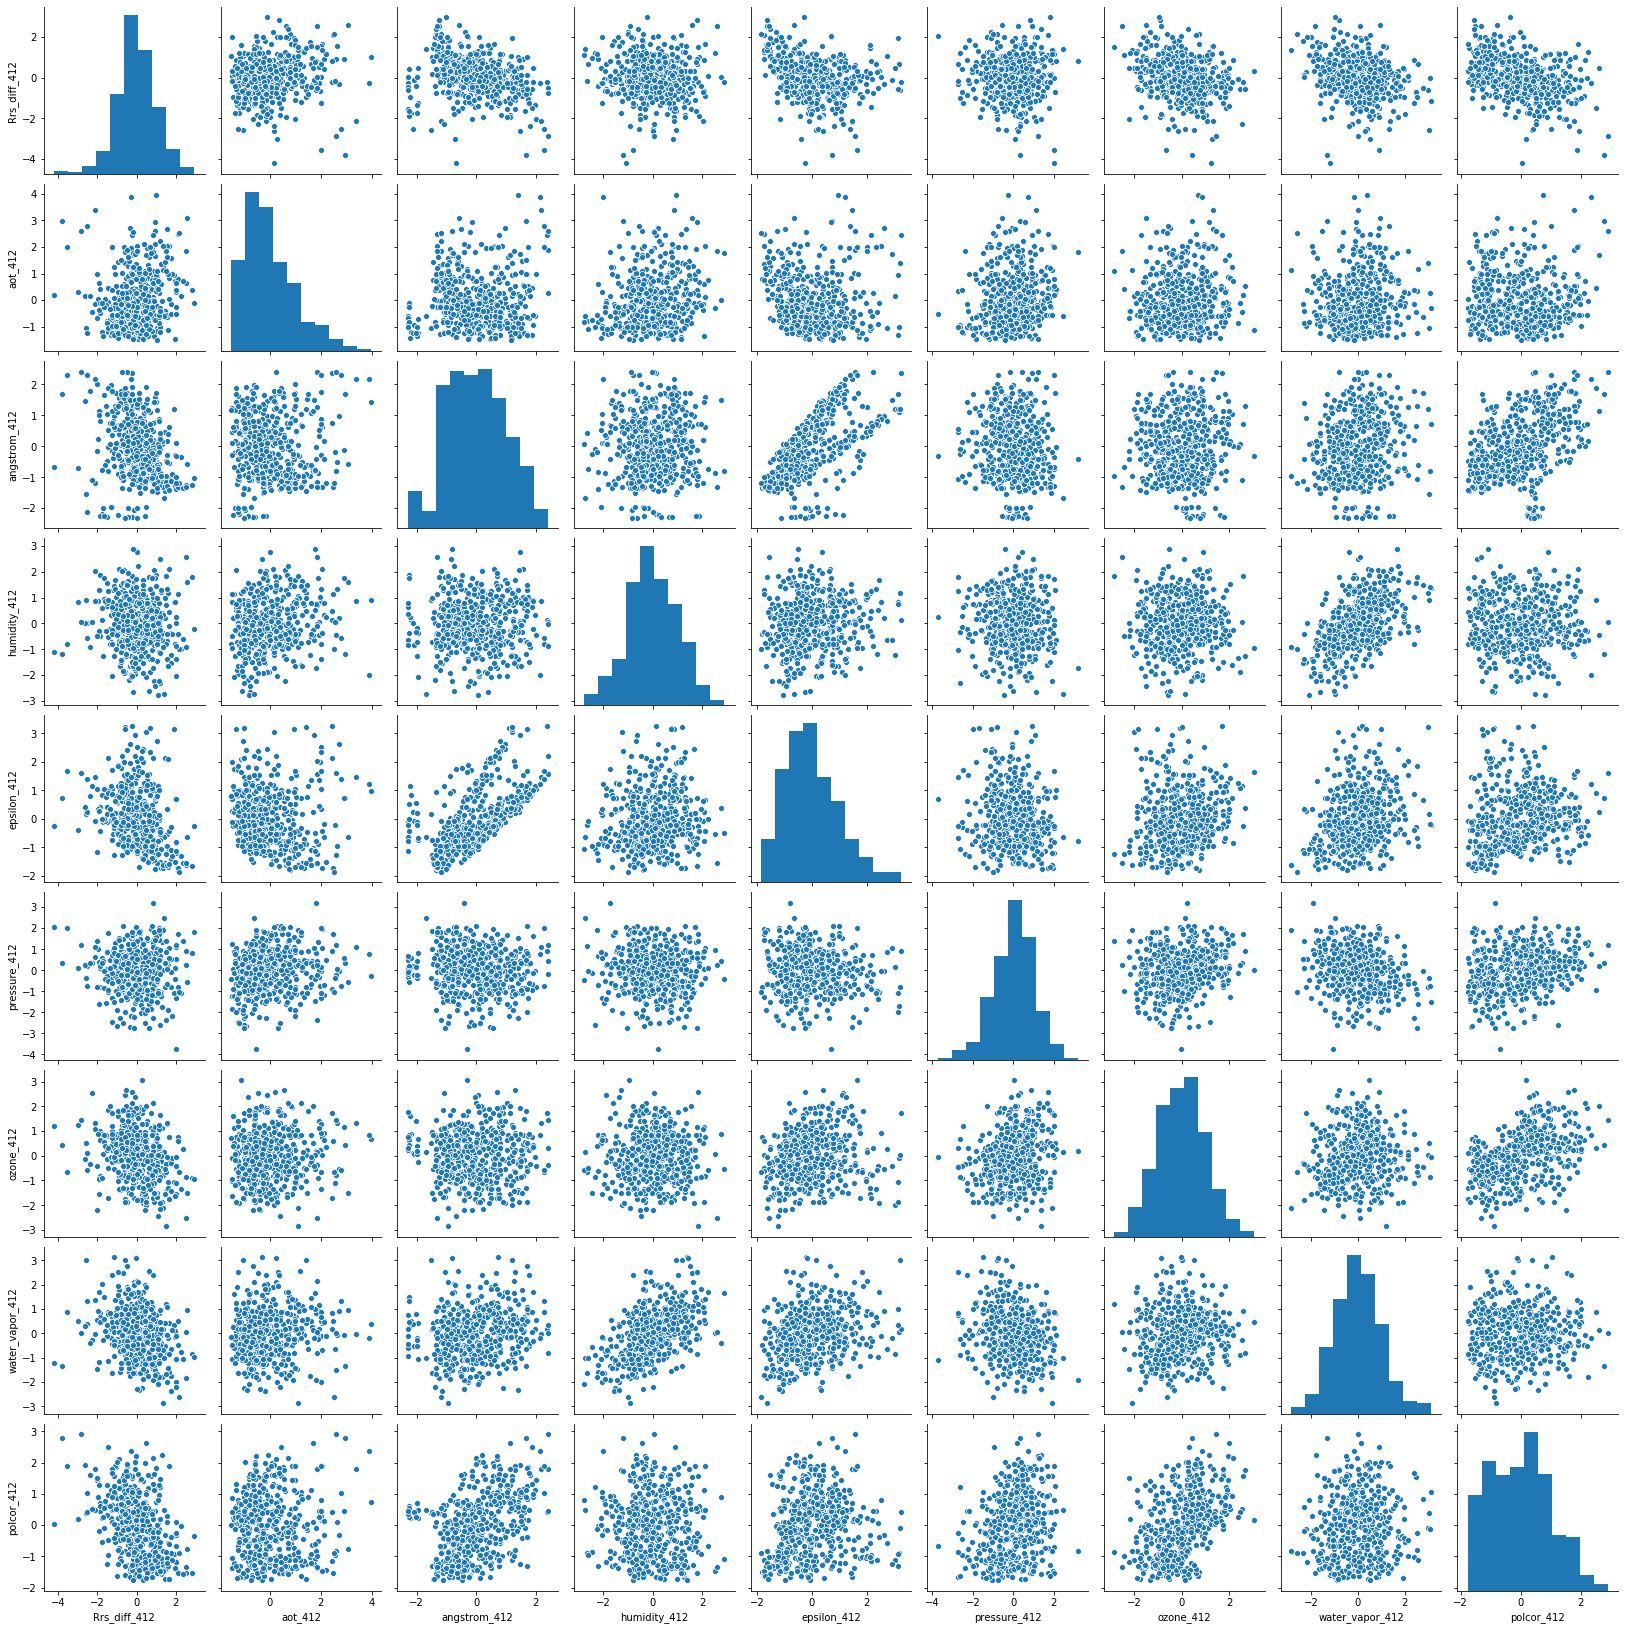

In [14]:
sns.pairplot(dfn, vars= ['Rrs_diff_412', 'aot_412', 'angstrom_412', 
                         'humidity_412', 'epsilon_412', 'pressure_412', 'ozone_412', 'water_vapor_412', 'polcor_412'] )


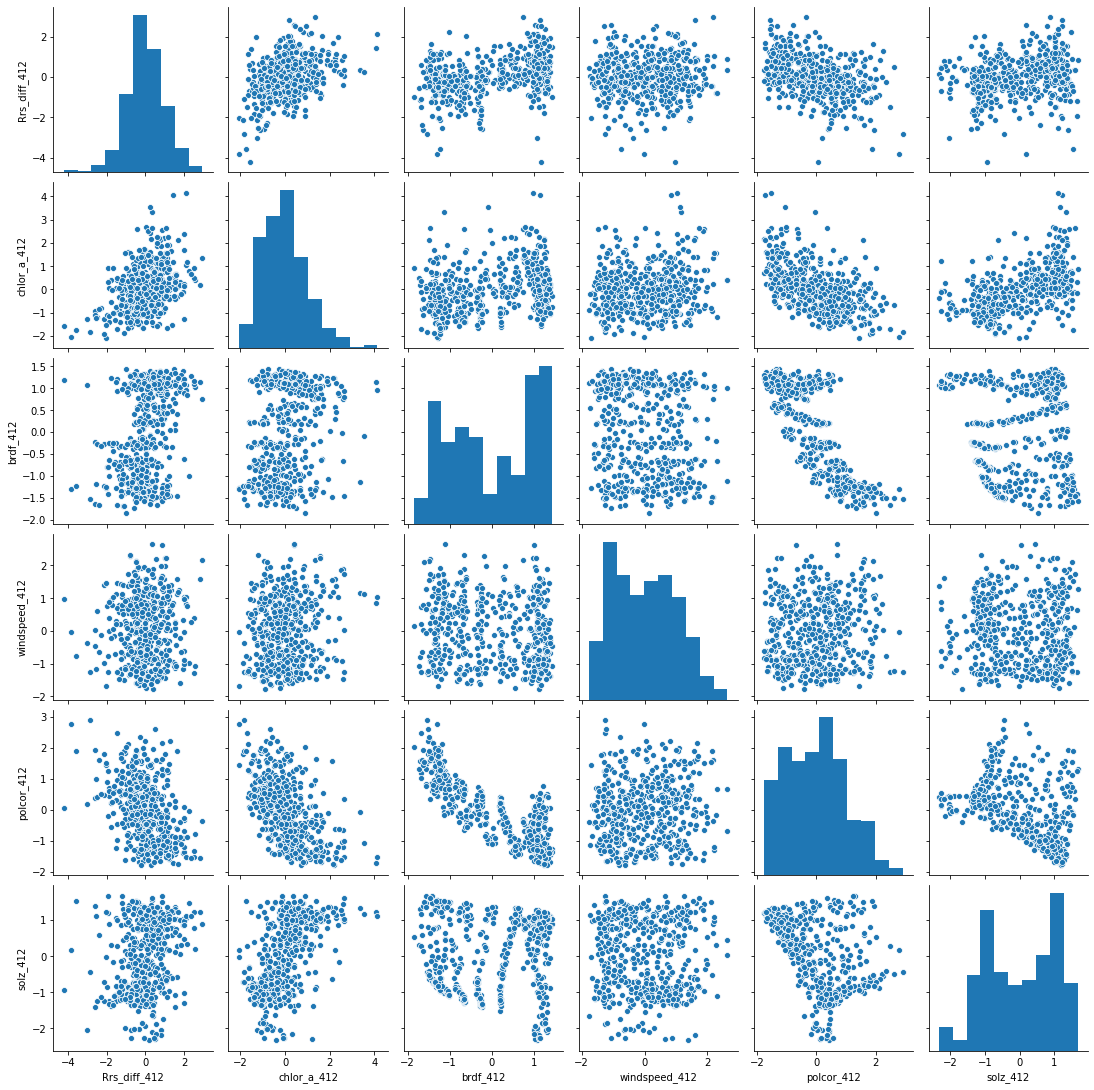

In [19]:
sns.pairplot(dfn, vars= ['Rrs_diff_412', 'chlor_a_412', 'brdf_412', 'windspeed_412', 'polcor_412', 'solz_412'] )


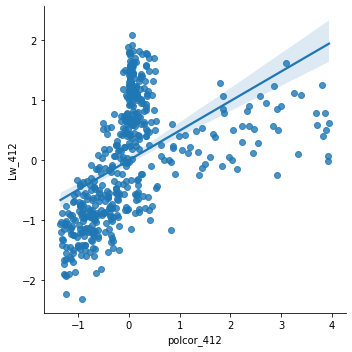

In [43]:
sns.lmplot('polcor_412', 'Lw_412', dfn, ci=95)


In [37]:
df['polcor_412']

0      1.000284
1      1.000033
2      0.999962
3      1.001781
4      1.015999
         ...   
518    1.013363
519    0.999731
520    1.011500
521    1.001025
522    0.999421
Name: polcor_412, Length: 523, dtype: float64

In [133]:
pd.set_option('display.max_rows', None)
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
water_vapor_412,507.0,2.945694,0.527587,1.452977e+00,2.598803e+00,2.930907e+00,3.263633,5.034211
water_vapor_443,507.0,2.945694,0.527587,1.452977e+00,2.598803e+00,2.930907e+00,3.263633,5.034211
water_vapor_488,507.0,2.945694,0.527587,1.452977e+00,2.598803e+00,2.930907e+00,3.263633,5.034211
water_vapor_531,507.0,2.945694,0.527587,1.452977e+00,2.598803e+00,2.930907e+00,3.263633,5.034211
water_vapor_547,507.0,2.945694,0.527587,1.452977e+00,2.598803e+00,2.930907e+00,3.263633,5.034211
water_vapor_555,507.0,2.945694,0.527587,1.452977e+00,2.598803e+00,2.930907e+00,3.263633,5.034211
water_vapor_667,507.0,2.945694,0.527587,1.452977e+00,2.598803e+00,2.930907e+00,3.263633,5.034211
water_vapor_678,507.0,2.945694,0.527587,1.452977e+00,2.598803e+00,2.930907e+00,3.263633,5.034211
solz_412,507.0,34.784288,10.844243,9.369385e+00,2.521939e+01,3.553885e+01,45.059687,52.988861
solz_443,507.0,34.784288,10.844243,9.369385e+00,2.521939e+01,3.553885e+01,45.059687,52.988861


In [139]:
# mnames =  [ 'Rrs_aqua','brdf', 'windspeed', 'glint_coeff']
# mnames =  ['Rrs_aqua','solz', 'senz', 'relaz']
# mnames =  ['Rrs_aqua','windspeed', 'water_vapor', 'humidity', 'pressure', 'ozone']
# mnames =  ['Rrs_aqua','angstrom', 'epsilon', 'aot', 'polcor']
# mnames =  ['Rrs_aqua','Lr', 'La', 'tLf', 'TLg']
# mnames =  ['Rrs_aqua','tsol', 'tsen', 'Tgsol', 'Tgsen']

(500,)

In [102]:
ls

angstrom.npy                         polcor.npy
aot.npy                              pressure.npy
brdf.npy                             README.md
chlor_a.npy                          read_modis_data_2.ipynb
correlation_plot_radiance_L_412.pdf  read_modis_data.ipynb
epsilon.npy                          relaz.npy
Es.npy                               rhot.npy
forest_plot_aerosol.pdf              Rrs_aqua.npy
forest_plot_ancillary_data.pdf       Rrs_mob.npy
forest_plot_at_surface.pdf           scattang.npy
forest_plot_geom.pdf                 senz.npy
forest_plot_radiances.pdf            solz.npy
glint_coef.npy                       tg_sen.npy
humidity.npy                         tg_sol.npy
La.npy                               tLf.npy
Lr.npy                               TLg.npy
Lt.npy                               t_sen.npy
Lw.npy                               t_sol.npy
moby_analysis_obs_aqua.ipynb         vcal_analysis.ipynb
moby_df                              water_vapor.npy
moby_df.npy